In [1]:
from fit_model_ import *

### Model 2.1

In [2]:
def define_embed_model(src_vocab,tar_vocab,src_timesteps,tar_timesteps, n_units, g_units,function="softmax"):
    """
    Build and train a RNN model using word embedding on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # Implement
    learning_rate = 0.001

    e = Embedding(src_vocab, n_units, input_length = src_timesteps,mask_zero=True)
    g = GRU(g_units)
    t = TimeDistributed(Dense(tar_vocab, activation=function))
  
    model = Sequential()
    model.add(e)
    model.add(g)
    model.add(RepeatVector(tar_timesteps))
   
    model.add(GRU(g_units, return_sequences=True))
    model.add(t) 
    
    return model

### Variante 1

### English → Spanish

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 5, 256)            581632    
                                                                 
 gru_10 (GRU)                (None, 128)               148224    
                                                                 
 repeat_vector_5 (RepeatVect  (None, 8, 128)           0         
 or)                                                             
                                                                 
 gru_11 (GRU)                (None, 8, 128)            99072     
                                                                 
 time_distributed_5 (TimeDis  (None, 8, 4510)          581790    
 tributed)                                                       
                                                                 


Epoch 33/100

Epoch 33: val_loss did not improve from 1.98712
125/125 - 14s - loss: 0.8650 - acc: 0.8045 - val_loss: 1.9903 - val_acc: 0.7239 - 14s/epoch - 109ms/step
Epoch 34/100

Epoch 34: val_loss improved from 1.98712 to 1.98402, saving model to Models100\cp_model_2_1.h5
125/125 - 14s - loss: 0.8275 - acc: 0.8104 - val_loss: 1.9840 - val_acc: 0.7266 - 14s/epoch - 115ms/step
Epoch 35/100

Epoch 35: val_loss improved from 1.98402 to 1.97790, saving model to Models100\cp_model_2_1.h5
125/125 - 14s - loss: 0.7925 - acc: 0.8178 - val_loss: 1.9779 - val_acc: 0.7259 - 14s/epoch - 111ms/step
Epoch 36/100

Epoch 36: val_loss did not improve from 1.97790
125/125 - 13s - loss: 0.7574 - acc: 0.8217 - val_loss: 1.9799 - val_acc: 0.7281 - 13s/epoch - 106ms/step
Epoch 37/100

Epoch 37: val_loss did not improve from 1.97790
125/125 - 14s - loss: 0.7261 - acc: 0.8296 - val_loss: 1.9791 - val_acc: 0.7269 - 14s/epoch - 109ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 1.97790
125/125 -

Epoch 82/100

Epoch 82: val_loss did not improve from 1.97790
125/125 - 14s - loss: 0.2205 - acc: 0.9086 - val_loss: 2.2060 - val_acc: 0.7247 - 14s/epoch - 109ms/step
Epoch 83/100

Epoch 83: val_loss did not improve from 1.97790
125/125 - 13s - loss: 0.2193 - acc: 0.9083 - val_loss: 2.2158 - val_acc: 0.7272 - 13s/epoch - 108ms/step
Epoch 84/100

Epoch 84: val_loss did not improve from 1.97790
125/125 - 13s - loss: 0.2157 - acc: 0.9082 - val_loss: 2.2158 - val_acc: 0.7267 - 13s/epoch - 106ms/step
Epoch 85/100

Epoch 85: val_loss did not improve from 1.97790
125/125 - 13s - loss: 0.2148 - acc: 0.9081 - val_loss: 2.2193 - val_acc: 0.7238 - 13s/epoch - 106ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 1.97790
125/125 - 13s - loss: 0.2133 - acc: 0.9086 - val_loss: 2.2283 - val_acc: 0.7260 - 13s/epoch - 108ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 1.97790
125/125 - 13s - loss: 0.2121 - acc: 0.9077 - val_loss: 2.2257 - val_acc: 0.7253 - 13s/epoch - 107ms/ste

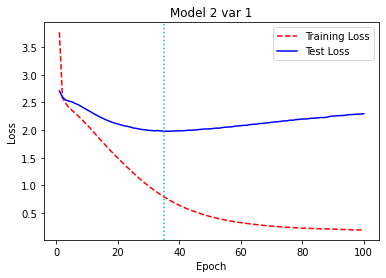

In [15]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
g_units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=64
model_save_file_name='Models100/cp_model_2_1.h5'
history_save_file_name="cp_history_2_1.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_embed_model(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,g_units, "softmax")
create_model(model,loss_func,learning_rate)
plot_model(model, to_file='model_images/cp_model_2_1_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model.history, 'loss_vs_epochs_images_100/cp_model_2_1_m.png', 'Model 2 var 1')

### Spanish → English

4510 2272 8 5
(8000, 8) (8000, 5) (2000, 8) (2000, 5)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 8, 256)            1154560   
                                                                 
 gru_2 (GRU)                 (None, 128)               148224    
                                                                 
 repeat_vector_1 (RepeatVect  (None, 5, 128)           0         
 or)                                                             
                                                                 
 gru_3 (GRU)                 (None, 5, 128)            99072     
                                                                 
 time_distributed_1 (TimeDis  (None, 5, 2272)          293088    
 tributed)                                                       
                                                                 


125/125 - 11s - loss: 0.2341 - acc: 0.9436 - val_loss: 0.2675 - val_acc: 0.9384 - 11s/epoch - 84ms/step
Epoch 34/100

Epoch 34: val_loss improved from 0.26643 to 0.26642, saving model to Models100\cp_model_ei_2_1.h5
125/125 - 10s - loss: 0.2335 - acc: 0.9435 - val_loss: 0.2664 - val_acc: 0.9382 - 10s/epoch - 84ms/step
Epoch 35/100

Epoch 35: val_loss did not improve from 0.26642
125/125 - 10s - loss: 0.2331 - acc: 0.9436 - val_loss: 0.2678 - val_acc: 0.9384 - 10s/epoch - 83ms/step
Epoch 36/100

Epoch 36: val_loss did not improve from 0.26642
125/125 - 10s - loss: 0.2330 - acc: 0.9437 - val_loss: 0.2680 - val_acc: 0.9382 - 10s/epoch - 84ms/step
Epoch 37/100

Epoch 37: val_loss did not improve from 0.26642
125/125 - 11s - loss: 0.2321 - acc: 0.9437 - val_loss: 0.2671 - val_acc: 0.9386 - 11s/epoch - 88ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 0.26642
125/125 - 10s - loss: 0.2318 - acc: 0.9439 - val_loss: 0.2677 - val_acc: 0.9385 - 10s/epoch - 84ms/step
Epoch 39/100

Ep

Epoch 83/100

Epoch 83: val_loss did not improve from 0.26642
125/125 - 10s - loss: 0.2277 - acc: 0.9442 - val_loss: 0.2707 - val_acc: 0.9384 - 10s/epoch - 83ms/step
Epoch 84/100

Epoch 84: val_loss did not improve from 0.26642
125/125 - 10s - loss: 0.2278 - acc: 0.9441 - val_loss: 0.2706 - val_acc: 0.9384 - 10s/epoch - 83ms/step
Epoch 85/100

Epoch 85: val_loss did not improve from 0.26642
125/125 - 11s - loss: 0.2276 - acc: 0.9441 - val_loss: 0.2707 - val_acc: 0.9382 - 11s/epoch - 86ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 0.26642
125/125 - 11s - loss: 0.2277 - acc: 0.9441 - val_loss: 0.2710 - val_acc: 0.9384 - 11s/epoch - 89ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 0.26642
125/125 - 11s - loss: 0.2277 - acc: 0.9442 - val_loss: 0.2707 - val_acc: 0.9383 - 11s/epoch - 87ms/step
Epoch 88/100

Epoch 88: val_loss did not improve from 0.26642
125/125 - 11s - loss: 0.2275 - acc: 0.9441 - val_loss: 0.2709 - val_acc: 0.9383 - 11s/epoch - 87ms/step
Epoc

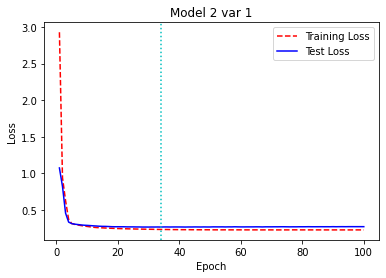

In [4]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
g_units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=64
model_save_file_name='Models100/cp_model_ei_2_1.h5'
history_save_file_name="cp_history_ei_2_1.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,1)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,0)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model_21 = define_embed_model(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,g_units, "softmax")
#model_21 = define_embed_model(spa_vocab_size, eng_vocab_size, spa_max_sentence_length, eng_max_sentence_length, units,g_units, "softmax")
create_model(model_21,loss_func,learning_rate)
plot_model(model_21, to_file='model_images/cp_model_ei_2_1_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model_21, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model_21.history, 'loss_vs_epochs_images_100/cp_model_ei_2_1_le.png', 'Model 2 var 1')

### Variante 2

### English → Spanish

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 32)             72704     
                                                                 
 gru_2 (GRU)                 (None, 64)                18816     
                                                                 
 repeat_vector_1 (RepeatVect  (None, 8, 64)            0         
 or)                                                             
                                                                 
 gru_3 (GRU)                 (None, 8, 64)             24960     
                                                                 
 time_distributed_1 (TimeDis  (None, 8, 4510)          293150    
 tributed)                                                       
                                                                 


Epoch 37/100

Epoch 37: val_loss did not improve from 2.01791
125/125 - 10s - loss: 0.4711 - acc: 0.8644 - val_loss: 2.1555 - val_acc: 0.7204 - 10s/epoch - 84ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 2.01791
125/125 - 11s - loss: 0.4611 - acc: 0.8657 - val_loss: 2.1717 - val_acc: 0.7164 - 11s/epoch - 85ms/step
Epoch 39/100

Epoch 39: val_loss did not improve from 2.01791
125/125 - 11s - loss: 0.4514 - acc: 0.8670 - val_loss: 2.1768 - val_acc: 0.7181 - 11s/epoch - 87ms/step
Epoch 40/100

Epoch 40: val_loss did not improve from 2.01791
125/125 - 11s - loss: 0.4370 - acc: 0.8705 - val_loss: 2.1883 - val_acc: 0.7215 - 11s/epoch - 84ms/step
Epoch 41/100

Epoch 41: val_loss did not improve from 2.01791
125/125 - 10s - loss: 0.4320 - acc: 0.8715 - val_loss: 2.1963 - val_acc: 0.7181 - 10s/epoch - 84ms/step
Epoch 42/100

Epoch 42: val_loss did not improve from 2.01791
125/125 - 10s - loss: 0.4224 - acc: 0.8722 - val_loss: 2.1959 - val_acc: 0.7188 - 10s/epoch - 82ms/step
Epoc

125/125 - 13s - loss: 0.2748 - acc: 0.8960 - val_loss: 2.5194 - val_acc: 0.7133 - 13s/epoch - 100ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 2.01791
125/125 - 14s - loss: 0.2712 - acc: 0.8966 - val_loss: 2.5236 - val_acc: 0.7134 - 14s/epoch - 111ms/step
Epoch 88/100

Epoch 88: val_loss did not improve from 2.01791
125/125 - 14s - loss: 0.2675 - acc: 0.8977 - val_loss: 2.5289 - val_acc: 0.7107 - 14s/epoch - 112ms/step
Epoch 89/100

Epoch 89: val_loss did not improve from 2.01791
125/125 - 11s - loss: 0.2687 - acc: 0.8979 - val_loss: 2.5404 - val_acc: 0.7103 - 11s/epoch - 90ms/step
Epoch 90/100

Epoch 90: val_loss did not improve from 2.01791
125/125 - 11s - loss: 0.2706 - acc: 0.8966 - val_loss: 2.5304 - val_acc: 0.7122 - 11s/epoch - 85ms/step
Epoch 91/100

Epoch 91: val_loss did not improve from 2.01791
125/125 - 10s - loss: 0.2671 - acc: 0.8978 - val_loss: 2.5415 - val_acc: 0.7144 - 10s/epoch - 83ms/step
Epoch 92/100

Epoch 92: val_loss did not improve from 2.01791
1

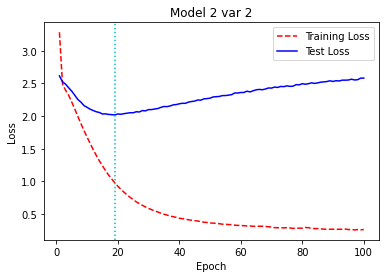

In [4]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 32
g_units = 64
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=64
model_save_file_name='Models100/cp_model_2_2.h5'
history_save_file_name="cp_history_2_2.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model2_2 = define_embed_model(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,g_units,"softmax")
create_model(model2_2,loss_func,learning_rate)
plot_model(model2_2, to_file='model_images/cp_model_2_2_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_2, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model2_2.history, 'loss_vs_epochs_images_100/cp_model_2_2_le.png', 'Model 2 var 2')

### Spanish → English

4510 4510 5 5
(8000, 8) (8000, 5) (2000, 8) (2000, 5)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 8, 32)             144320    
                                                                 
 gru_12 (GRU)                (None, 64)                18816     
                                                                 
 repeat_vector_6 (RepeatVect  (None, 5, 64)            0         
 or)                                                             
                                                                 
 gru_13 (GRU)                (None, 5, 64)             24960     
                                                                 
 time_distributed_6 (TimeDis  (None, 5, 2272)          147680    
 tributed)                                                       
                                                                 


Epoch 36/100

Epoch 36: val_loss did not improve from 0.26260
125/125 - 4s - loss: 0.2319 - acc: 0.9437 - val_loss: 0.2669 - val_acc: 0.9385 - 4s/epoch - 34ms/step
Epoch 37/100

Epoch 37: val_loss did not improve from 0.26260
125/125 - 4s - loss: 0.2310 - acc: 0.9438 - val_loss: 0.2660 - val_acc: 0.9382 - 4s/epoch - 35ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 0.26260
125/125 - 4s - loss: 0.2305 - acc: 0.9440 - val_loss: 0.2670 - val_acc: 0.9387 - 4s/epoch - 33ms/step
Epoch 39/100

Epoch 39: val_loss did not improve from 0.26260
125/125 - 4s - loss: 0.2305 - acc: 0.9440 - val_loss: 0.2683 - val_acc: 0.9382 - 4s/epoch - 36ms/step
Epoch 40/100

Epoch 40: val_loss did not improve from 0.26260
125/125 - 4s - loss: 0.2302 - acc: 0.9440 - val_loss: 0.2658 - val_acc: 0.9385 - 4s/epoch - 35ms/step
Epoch 41/100

Epoch 41: val_loss did not improve from 0.26260
125/125 - 4s - loss: 0.2296 - acc: 0.9441 - val_loss: 0.2685 - val_acc: 0.9390 - 4s/epoch - 35ms/step
Epoch 42/100

Ep

Epoch 86/100

Epoch 86: val_loss did not improve from 0.26260
125/125 - 4s - loss: 0.2277 - acc: 0.9441 - val_loss: 0.2717 - val_acc: 0.9384 - 4s/epoch - 32ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 0.26260
125/125 - 4s - loss: 0.2274 - acc: 0.9442 - val_loss: 0.2729 - val_acc: 0.9384 - 4s/epoch - 33ms/step
Epoch 88/100

Epoch 88: val_loss did not improve from 0.26260
125/125 - 4s - loss: 0.2278 - acc: 0.9440 - val_loss: 0.2727 - val_acc: 0.9383 - 4s/epoch - 32ms/step
Epoch 89/100

Epoch 89: val_loss did not improve from 0.26260
125/125 - 4s - loss: 0.2282 - acc: 0.9442 - val_loss: 0.2722 - val_acc: 0.9384 - 4s/epoch - 34ms/step
Epoch 90/100

Epoch 90: val_loss did not improve from 0.26260
125/125 - 4s - loss: 0.2281 - acc: 0.9441 - val_loss: 0.2718 - val_acc: 0.9384 - 4s/epoch - 32ms/step
Epoch 91/100

Epoch 91: val_loss did not improve from 0.26260
125/125 - 4s - loss: 0.2276 - acc: 0.9442 - val_loss: 0.2713 - val_acc: 0.9384 - 4s/epoch - 32ms/step
Epoch 92/100

Ep

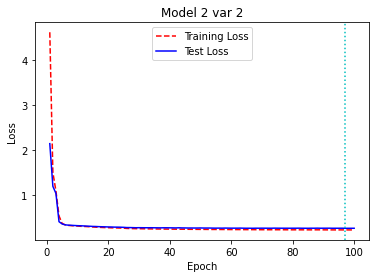

In [18]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 32
g_units = 64
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=64
model_save_file_name='Models100/cp_model_ei_2_2.h5'
history_save_file_name="cp_history_ei_2_2.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

src_tokenizer,src_vocab_size,src_max_sentence_length = prepare_tokenizer(dataset,1)
tar_tokenizer,tar_vocab_size,tar_max_sentence_length = prepare_tokenizer(dataset,0)
print(src_vocab_size,src_vocab_size,tar_max_sentence_length,tar_max_sentence_length)

trainX, trainY =  preprocess_input(src_tokenizer, src_max_sentence_length, tar_tokenizer, tar_max_sentence_length,tar_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(src_tokenizer, src_max_sentence_length, tar_tokenizer, tar_max_sentence_length,tar_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model2_2_ei = define_embed_model(src_vocab_size, tar_vocab_size, src_max_sentence_length, tar_max_sentence_length, units,g_units,"softmax")
create_model(model2_2_ei,loss_func,learning_rate)
plot_model(model2_2_ei, to_file='model_images/cp_model_ei_2_2_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_2_ei, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model2_3_ei.history, 'loss_vs_epochs_images_100/cp_model_ei_2_2_le.png', 'Model 2 var 2')

### Variante 3

### English → Spanish

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 5, 64)             145408    
                                                                 
 gru_4 (GRU)                 (None, 32)                9408      
                                                                 
 repeat_vector_2 (RepeatVect  (None, 8, 32)            0         
 or)                                                             
                                                                 
 gru_5 (GRU)                 (None, 8, 32)             6336      
                                                                 
 time_distributed_2 (TimeDis  (None, 8, 4510)          148830    
 tributed)                                                       
                                                                 


63/63 - 12s - loss: 1.5971 - acc: 0.7079 - val_loss: 2.2296 - val_acc: 0.6846 - 12s/epoch - 189ms/step
Epoch 34/100

Epoch 34: val_loss improved from 2.22962 to 2.21130, saving model to Models100\cp_model_2_3.h5
63/63 - 11s - loss: 1.5664 - acc: 0.7109 - val_loss: 2.2113 - val_acc: 0.6880 - 11s/epoch - 181ms/step
Epoch 35/100

Epoch 35: val_loss did not improve from 2.21130
63/63 - 10s - loss: 1.5368 - acc: 0.7142 - val_loss: 2.2148 - val_acc: 0.6865 - 10s/epoch - 163ms/step
Epoch 36/100

Epoch 36: val_loss improved from 2.21130 to 2.20697, saving model to Models100\cp_model_2_3.h5
63/63 - 10s - loss: 1.5095 - acc: 0.7154 - val_loss: 2.2070 - val_acc: 0.6881 - 10s/epoch - 153ms/step
Epoch 37/100

Epoch 37: val_loss improved from 2.20697 to 2.20294, saving model to Models100\cp_model_2_3.h5
63/63 - 10s - loss: 1.4827 - acc: 0.7186 - val_loss: 2.2029 - val_acc: 0.6884 - 10s/epoch - 161ms/step
Epoch 38/100

Epoch 38: val_loss improved from 2.20294 to 2.19099, saving model to Models100\cp_

Epoch 80/100

Epoch 80: val_loss did not improve from 2.17110
63/63 - 10s - loss: 0.8902 - acc: 0.7944 - val_loss: 2.2209 - val_acc: 0.6980 - 10s/epoch - 161ms/step
Epoch 81/100

Epoch 81: val_loss did not improve from 2.17110
63/63 - 9s - loss: 0.8783 - acc: 0.7966 - val_loss: 2.2165 - val_acc: 0.7007 - 9s/epoch - 142ms/step
Epoch 82/100

Epoch 82: val_loss did not improve from 2.17110
63/63 - 9s - loss: 0.8684 - acc: 0.7985 - val_loss: 2.2136 - val_acc: 0.7014 - 9s/epoch - 143ms/step
Epoch 83/100

Epoch 83: val_loss did not improve from 2.17110
63/63 - 9s - loss: 0.8634 - acc: 0.7981 - val_loss: 2.2126 - val_acc: 0.7001 - 9s/epoch - 140ms/step
Epoch 84/100

Epoch 84: val_loss did not improve from 2.17110
63/63 - 9s - loss: 0.8573 - acc: 0.7985 - val_loss: 2.2158 - val_acc: 0.7003 - 9s/epoch - 140ms/step
Epoch 85/100

Epoch 85: val_loss did not improve from 2.17110
63/63 - 9s - loss: 0.8490 - acc: 0.7995 - val_loss: 2.2179 - val_acc: 0.7009 - 9s/epoch - 137ms/step
Epoch 86/100

Epoch 

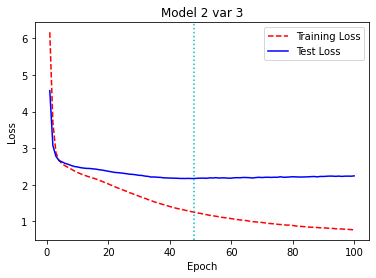

In [5]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 64
g_units=32
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=128
model_save_file_name='Models100/cp_model_2_3.h5'
history_save_file_name="cp_history_2_3.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model2_3 = define_embed_model(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,g_units,"sigmoid")
create_model(model2_3,loss_func,learning_rate)
plot_model(model2_3, to_file='model_images/cp_model_2_3_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_3, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model2_3.history, 'loss_vs_epochs_images_100/cp_model_2_3_le.png', 'Model 2 var 3')

### Spanish → English

4510 4510 5 5
(8000, 8) (8000, 5) (2000, 8) (2000, 5)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 8, 64)             288640    
                                                                 
 gru_8 (GRU)                 (None, 32)                9408      
                                                                 
 repeat_vector_4 (RepeatVect  (None, 5, 32)            0         
 or)                                                             
                                                                 
 gru_9 (GRU)                 (None, 5, 32)             6336      
                                                                 
 time_distributed_4 (TimeDis  (None, 5, 2272)          74976     
 tributed)                                                       
                                                                 


63/63 - 3s - loss: 0.2494 - acc: 0.9383 - val_loss: 0.2739 - val_acc: 0.9351 - 3s/epoch - 54ms/step
Epoch 34/100

Epoch 34: val_loss did not improve from 0.27390
63/63 - 3s - loss: 0.2485 - acc: 0.9384 - val_loss: 0.2745 - val_acc: 0.9350 - 3s/epoch - 53ms/step
Epoch 35/100

Epoch 35: val_loss improved from 0.27390 to 0.27344, saving model to Models100\cp_model_ei_2_3.h5
63/63 - 3s - loss: 0.2474 - acc: 0.9387 - val_loss: 0.2734 - val_acc: 0.9346 - 3s/epoch - 52ms/step
Epoch 36/100

Epoch 36: val_loss improved from 0.27344 to 0.27249, saving model to Models100\cp_model_ei_2_3.h5
63/63 - 3s - loss: 0.2468 - acc: 0.9386 - val_loss: 0.2725 - val_acc: 0.9352 - 3s/epoch - 54ms/step
Epoch 37/100

Epoch 37: val_loss improved from 0.27249 to 0.27184, saving model to Models100\cp_model_ei_2_3.h5
63/63 - 4s - loss: 0.2459 - acc: 0.9387 - val_loss: 0.2718 - val_acc: 0.9351 - 4s/epoch - 63ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 0.27184
63/63 - 3s - loss: 0.2452 - acc: 0.9388 

Epoch 79/100

Epoch 79: val_loss did not improve from 0.26274
63/63 - 4s - loss: 0.2287 - acc: 0.9430 - val_loss: 0.2635 - val_acc: 0.9379 - 4s/epoch - 64ms/step
Epoch 80/100

Epoch 80: val_loss did not improve from 0.26274
63/63 - 4s - loss: 0.2285 - acc: 0.9430 - val_loss: 0.2639 - val_acc: 0.9379 - 4s/epoch - 63ms/step
Epoch 81/100

Epoch 81: val_loss did not improve from 0.26274
63/63 - 4s - loss: 0.2287 - acc: 0.9429 - val_loss: 0.2638 - val_acc: 0.9380 - 4s/epoch - 63ms/step
Epoch 82/100

Epoch 82: val_loss did not improve from 0.26274
63/63 - 4s - loss: 0.2281 - acc: 0.9431 - val_loss: 0.2650 - val_acc: 0.9380 - 4s/epoch - 62ms/step
Epoch 83/100

Epoch 83: val_loss did not improve from 0.26274
63/63 - 4s - loss: 0.2284 - acc: 0.9431 - val_loss: 0.2635 - val_acc: 0.9381 - 4s/epoch - 60ms/step
Epoch 84/100

Epoch 84: val_loss did not improve from 0.26274
63/63 - 4s - loss: 0.2280 - acc: 0.9432 - val_loss: 0.2631 - val_acc: 0.9381 - 4s/epoch - 58ms/step
Epoch 85/100

Epoch 85: val_

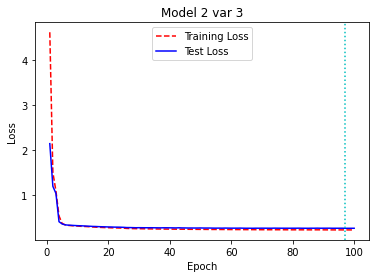

In [7]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 64
g_units=32
learning_rate = 0.005
loss_func='sparse_categorical_crossentropy'
epochs=100
batch_size=128
model_save_file_name='Models100/cp_model_ei_2_3.h5'
history_save_file_name="cp_history_ei_2_3.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

src_tokenizer,src_vocab_size,src_max_sentence_length = prepare_tokenizer(dataset,1)
tar_tokenizer,tar_vocab_size,tar_max_sentence_length = prepare_tokenizer(dataset,0)
print(src_vocab_size,src_vocab_size,tar_max_sentence_length,tar_max_sentence_length)

trainX, trainY =  preprocess_input(src_tokenizer, src_max_sentence_length, tar_tokenizer, tar_max_sentence_length,tar_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(src_tokenizer, src_max_sentence_length, tar_tokenizer, tar_max_sentence_length,tar_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model2_3_ei = define_embed_model(src_vocab_size, tar_vocab_size, src_max_sentence_length, tar_max_sentence_length, units,g_units,"sigmoid")
create_model(model2_3_ei,loss_func,learning_rate)
plot_model(model2_3_ei, to_file='model_images/cp_model_ei_2_3_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_3_ei, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model2_3_ei.history, 'loss_vs_epochs_images_100/cp_model_ei_2_3_le.png', 'Model 2 var 3')

Text(0, 0.5, 'LOSS')

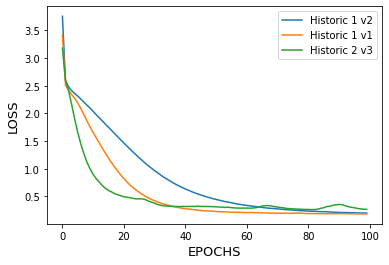

In [10]:
hist1 = load_history("cp_history_2_1.npy")
"""hist2 = load_history("cp_history_2_2.npy")
hist3 = load_history("cp_history_2_3.npy")

hist11 = load_history("cp_history_1_1.npy")
hist21 = load_history("cp_history_1_2.npy")
hist31 = load_history("cp_history_1_3.npy")

hist13 = load_history("cp_history_3_1.npy")
hist23 = load_history("cp_history_3_2.npy")
hist33 = load_history("cp_history_3_3.npy")"""
for x in ['loss']:
    plt.plot(hist1[x],label="Historic 1 v2")
    #plt.plot(hist2[x],label="Historic 2 v2")
    #plt.plot(hist3[x],label="Historic 3 v2")
    """plt.plot(hist11[x],label="Historic 1 v1")
    #plt.plot(hist21[x],label="Historic 2 v1")
    #plt.plot(hist31[x],label="Historic 3 v1")
    #plt.plot(hist13[x],label="Historic 1 v3")
    plt.plot(hist23[x],label="Historic 2 v3")"""
    #plt.plot(hist33[x],label="Historic 3 v3")
plt.legend()
plt.xlabel("Epoch",fontsize=13)
plt.ylabel("Loss",fontsize=13)

### One hot encoding

In [ ]:
### Historic 1 es el mejor
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', 'dataset/english-spanish-train-10000.txt','dataset/english-spanish-test-10000.txt'
units = 256
g_units = 128
learning_rate = 0.001
loss_func='categorical_crossentropy'
epochs=64
batch_size=64
model_save_file_name='Models/cp_model_ohe_2_1.h5'
history_save_file_name="cp_history_ohe_2_1.npy"

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=True)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=True)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model2_1_ohe = define_embed_model(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units,g_units, "softmax")
create_model(model2_1_ohe,loss_func,learning_rate)
plot_model(model2_1_ohe, to_file='model_images/cp_model_ohe_2_1_m.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model2_1_ohe, model_save_file_name,history_save_file_name)
graph_loss_vs_epochs(model.history, 'loss_vs_epochs_images/cp_model_ohe_2_1_m.png', 'Model 2 var 1')

2272 4510 5 8
